In [33]:
import os
import re
import numpy as np
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
import glob
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from PIL import Image
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import cv2 as cv
from keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
input_data="chest_Xray/"
train_directory= input_data + "train/"
val_directory= input_data + "val/"
test_directory= input_data + "test/"

data_dir = train_directory
class_names=os.listdir(train_directory)
print(class_names)

['NORMAL', 'PNEUMONIA']


In [35]:
def get_model_accuracy_color(train_folder, validation_folder, batch_size, image_size, optimizer, epochs, param_evaluated):
    print("Evaluating " + param_evaluated)

    # Prepare iterators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    train_it = datagen.flow_from_directory(directory=train_folder,
                                           class_mode='binary', batch_size=batch_size,
                                           target_size=(image_size, image_size))
    val_it = datagen.flow_from_directory(directory=validation_folder,
                                         class_mode='binary', batch_size=batch_size,
                                         target_size=(image_size, image_size))
    test_it = datagen.flow_from_directory(test_directory,
                                          class_mode='binary', batch_size=batch_size,
                                          target_size=(image_size, image_size))

    # create model
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(image_size, image_size, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Define learning rate scheduler
    def lr_scheduler(epoch):
        lr = 0.001
        if epoch > 10:
            lr = 0.0001
        return lr

    # Create learning rate scheduler callback
    lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

    # Train the model
    model.fit(train_it,
              validation_data=val_it,
              steps_per_epoch=train_it.n // train_it.batch_size,
              validation_steps=val_it.n // val_it.batch_size,
              epochs=epochs, verbose=1,
              callbacks=[lr_scheduler_callback])

    # Evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
    return acc

In [36]:
def get_model_accuracy(train_folder, validation_folder, batch_size, image_size, optimizer, epochs, param_evaluated):
    print("Evaluating " + param_evaluated)

    # Prepare iterators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0, preprocessing_function=tf.keras.preprocessing.image.img_to_array)
    train_it = datagen.flow_from_directory(directory=train_folder,
                                           class_mode='binary', batch_size=batch_size,
                                           target_size=(image_size, image_size), color_mode='grayscale')
    val_it = datagen.flow_from_directory(directory=validation_folder,
                                         class_mode='binary', batch_size=batch_size,
                                         target_size=(image_size, image_size), color_mode='grayscale')
    test_it = datagen.flow_from_directory(test_directory,
                                          class_mode='binary', batch_size=batch_size,
                                          target_size=(image_size, image_size), color_mode='grayscale')

    # create model
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(image_size, image_size, 1)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Define learning rate scheduler
    def lr_scheduler(epoch):
        lr = 0.001
        if epoch > 10:
            lr = 0.0001
        return lr

    # Create learning rate scheduler callback
    lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

    # Train the model
    model.fit(train_it,
              validation_data=val_it,
              steps_per_epoch=train_it.n // train_it.batch_size,
              validation_steps=val_it.n // val_it.batch_size,
              epochs=epochs, verbose=1,
              callbacks=[lr_scheduler_callback])

    # Evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
    return acc

In [37]:
import matplotlib.pyplot as plt

def plot_accuracy(param, accuracies, label, xlabel, ylabel):
    plt.plot(param, accuracies, label=label, marker='o', linestyle='-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.25, 0.8))
    plt.show()

In [38]:
BATCH_SIZE_32 = 32

OPTIMIZER_ADAM = 'adam'
OPTIMIZER_SGD = 'sgd'
OPTIMIZER_RMSPROP= 'rmsprop'
optimizer_array = [OPTIMIZER_ADAM, OPTIMIZER_SGD, OPTIMIZER_RMSPROP]

EPOCHS_5 = 5
EPOCHS_10 = 10
EPOCHS_20 = 20
epoch_array = [EPOCHS_5, EPOCHS_10, EPOCHS_20]

# Common image sizes include 64x64, 128x128, 28x28 (MNIST), and 224x224 (VGG-16).
IMAGE_SIZE_128 = 128
IMAGE_SIZE_64 = 64
IMAGE_SIZE_28 = 28
image_size_array = [IMAGE_SIZE_128, IMAGE_SIZE_64, IMAGE_SIZE_28]

In [39]:
import matplotlib.pyplot as plt

def plot_accuracy(param, accuracies, label, xlabel, ylabel):
    plt.plot(param, accuracies, label=label, marker='o', linestyle='-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.25, 0.8))
    plt.show()

Evaluating image_size 128
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 625 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 65s 396ms/step - loss: 0.7860 - accuracy: 0.8974 - lr: 0.0010
Epoch 2/5
163/163 [==============================] - 65s 397ms/step - loss: 0.1021 - accuracy: 0.9636 - lr: 0.0010
Epoch 3/5
163/163 [==============================] - 63s 386ms/step - loss: 0.0316 - accuracy: 0.9891 - lr: 0.0010
Epoch 4/5
163/163 [==============================] - 65s 401ms/step - loss: 0.0139 - accuracy: 0.9950 - lr: 0.0010
Epoch 5/5
20/20 [==============================] - 4s 175ms/step - loss: 0.9662 - accuracy: 0.7920
Evaluating image_size 64
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 625 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 38s 229ms/step - loss: 0.5664 - accuracy: 0.8871 - lr: 0.0010
Epoch 2/5
163/163 [==========

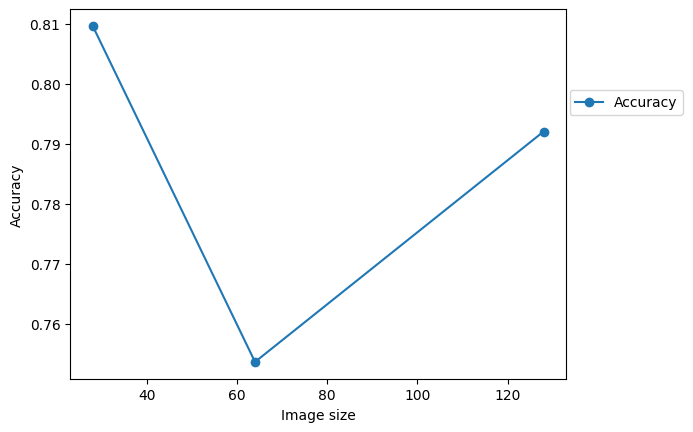

In [40]:
# https://blog.paperspace.com/how-to-maximize-gpu-utilization-by-finding-the-right-batch-size/#accuracy-and-algorithm-performance

accuracies_image_size_data = []
for image_size in image_size_array:
  accuracies_image_size_data.append(get_model_accuracy(train_directory, val_directory, BATCH_SIZE_32, image_size, OPTIMIZER_ADAM, EPOCHS_5, "image_size " + str(image_size)))
  
optimal_image_size = image_size_array[np.argmax(accuracies_image_size_data)]
print("Optimal image size: " + str(optimal_image_size))

plot_accuracy(image_size_array, accuracies_image_size_data, "Accuracy", "Image size", "Accuracy")

Evaluating image_size 28
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 625 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 30s 179ms/step - loss: 0.2702 - accuracy: 0.8974 - lr: 0.0010
Epoch 2/5
163/163 [==============================] - 28s 173ms/step - loss: 0.1143 - accuracy: 0.9569 - lr: 0.0010
Epoch 3/5
163/163 [==============================] - 28s 174ms/step - loss: 0.0840 - accuracy: 0.9699 - lr: 0.0010
Epoch 4/5
163/163 [==============================] - 28s 173ms/step - loss: 0.0715 - accuracy: 0.9741 - lr: 0.0010
Epoch 5/5
20/20 [==============================] - 3s 131ms/step - loss: 0.7674 - accuracy: 0.7888
Evaluating image_size 28
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 625 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 29s 173ms/step - loss: 0.3609 - accuracy: 0.8462 - lr: 0.0010
Epoch 2/5
163/163 [===========

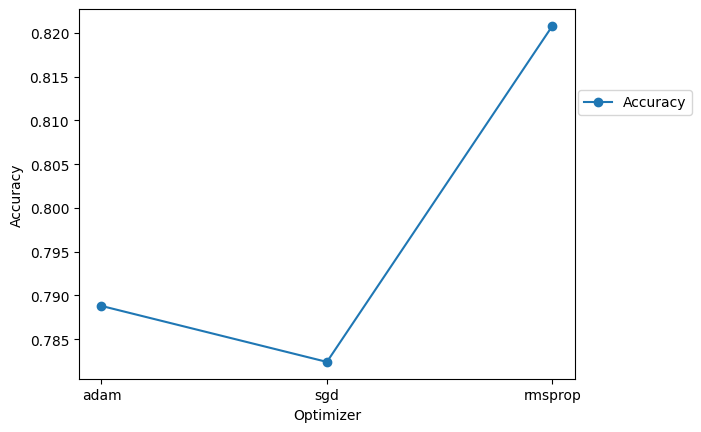

In [41]:
accuracies_optimizer_size_data = []
for optimizer in optimizer_array:
  accuracies_optimizer_size_data.append(get_model_accuracy(train_directory, val_directory, BATCH_SIZE_32, optimal_image_size, OPTIMIZER_ADAM, EPOCHS_5, "image_size " + str(image_size)))
  
optimal_optimizer = optimizer_array[np.argmax(accuracies_optimizer_size_data)]
print("Optimal optimizer: " + str(optimal_optimizer))

plot_accuracy(optimizer_array, accuracies_optimizer_size_data, "Accuracy", "Optimizer", "Accuracy")

Evaluating image_size 28
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 625 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 37s 223ms/step - loss: 0.4911 - accuracy: 0.8090 - lr: 0.0010
Epoch 2/5
163/163 [==============================] - 33s 204ms/step - loss: 0.2023 - accuracy: 0.9195 - lr: 0.0010
Epoch 3/5
163/163 [==============================] - 33s 205ms/step - loss: 0.1400 - accuracy: 0.9448 - lr: 0.0010
Epoch 4/5
163/163 [==============================] - 39s 237ms/step - loss: 0.1162 - accuracy: 0.9532 - lr: 0.0010
Epoch 5/5
20/20 [==============================] - 4s 202ms/step - loss: 0.7442 - accuracy: 0.7696
Evaluating image_size 28
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 625 images belonging to 2 classes.
Epoch 1/5
163/163 [==============================] - 35s 210ms/step - loss: 0.4710 - accuracy: 0.8290 - lr: 0.0010
Epoch 2/5
163/163 [===========

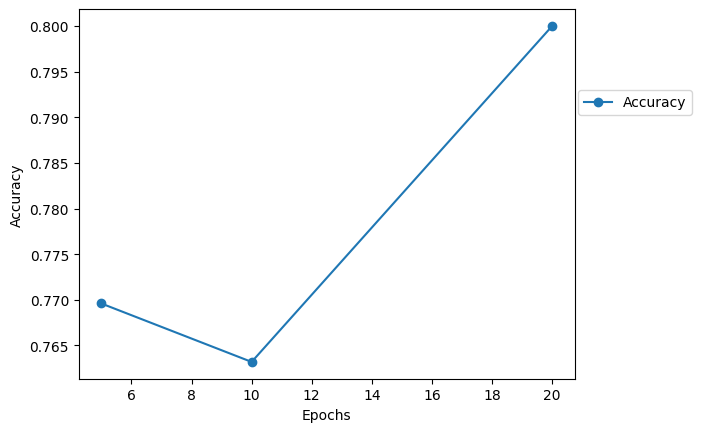

In [42]:
accuracies_epochs_size_data = []
for epoch in epoch_array:
  accuracies_epochs_size_data.append(get_model_accuracy(train_directory, val_directory, BATCH_SIZE_32, optimal_image_size, optimal_optimizer, EPOCHS_5, "image_size " + str(image_size)))
  
optimal_epochs = epoch_array[np.argmax(accuracies_epochs_size_data)]
print("Optimal epochs: " + str(optimal_epochs))

plot_accuracy(epoch_array, accuracies_epochs_size_data, "Accuracy", "Epochs", "Accuracy")

In [43]:
print("Optimal image size: " + str(optimal_image_size))
print("Optimal optimizer: " + str(optimal_optimizer))
print("Optimal epochs value: " + str(optimal_epochs))

Optimal image size: 28
Optimal optimizer: rmsprop
Optimal epochs value: 20
